In [1]:
%matplotlib inline
import pandas as pd

In [ ]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

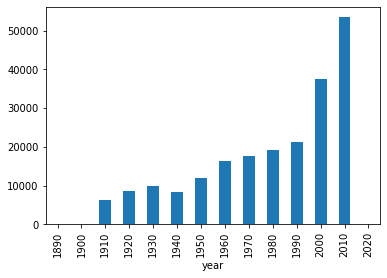

In [5]:
t = titles
t = t.groupby((t.year // 10) * 10)
t.size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

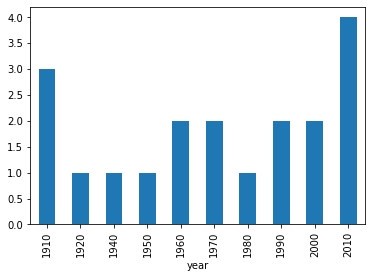

In [6]:
t = titles
t = t[t.title == 'Hamlet']           
t = t.groupby((t.year // 10) * 10)
t.size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
c = cast
c = c[(c.n == 1) & (c.year // 10 == 195)]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      605
      actress    267
1951  actor      628
      actress    272
1952  actor      589
      actress    283
1953  actor      632
      actress    286
1954  actor      620
      actress    298
1955  actor      602
      actress    264
1956  actor      610
      actress    286
1957  actor      704
      actress    281
1958  actor      694
      actress    275
1959  actor      672
      actress    285
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [9]:
c = cast
c = c[(c.n < 6) & (c.year // 10 == 195)]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6356
     actress    2797
2.0  actor      4364
     actress    4379
3.0  actor      5381
     actress    3008
4.0  actor      5375
     actress    2738
5.0  actor      5408
     actress    2433
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [10]:
c = cast
c = c[c.title == 'The Pink Panther']
c.groupby('year').size()

year
1963    19
2006    88
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [11]:
c = cast[cast.name == 'Frank Oz']
c = c.groupby(['year','title']).size()
c[c>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [12]:
c = cast[cast.name == 'Frank Oz']
c = c.groupby(['character']).size()
c[c>1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64